In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.rename(columns={'R&D Spend': 'RD_Spend', 'Marketing Spend': 'Marketing_Spend'}, inplace = True)

In [4]:
df = df.astype({"RD_Spend":'int64', "Administration":'int64', "Marketing_Spend":'int64', "Profit":'int64'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RD_Spend         50 non-null     int64 
 1   Administration   50 non-null     int64 
 2   Marketing_Spend  50 non-null     int64 
 3   State            50 non-null     object
 4   Profit           50 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RD_Spend,50.0,73721.12,45902.243332,0.0,39935.75,73050.5,101602.50,165349.0
Administration,50.0,121344.16,28017.769943,51283.0,103730.50,122699.0,144841.50,182645.0
Marketing_Spend,50.0,211024.64,122290.245675,0.0,129299.50,212715.5,299468.75,471784.0
Profit,50.0,112012.10,40306.158254,14681.0,90138.75,107978.0,139765.50,192261.0


In [7]:
df['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [8]:
df.drop(columns='State', axis=1, inplace=True)
df.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349,136897,471784,192261
1,162597,151377,443898,191792
2,153441,101145,407934,191050
3,144372,118671,383199,182901
4,142107,91391,366168,166187


In [9]:
df.replace(0, np.nan, inplace=True)

In [10]:
median_values_RD_Spend = df['RD_Spend'].median()
median_values_RD_Spend

74661.0

In [11]:
median_values_Administration = df['Administration'].median()
median_values_Administration

122699.0

In [12]:
median_values_Marketing_Spend = df['Marketing_Spend'].median()
median_values_Marketing_Spend

229160.0

In [13]:
df['RD_Spend'].fillna(median_values_RD_Spend, inplace=True)

In [14]:
df['Administration'].fillna(median_values_Administration, inplace=True)

In [15]:
df['Marketing_Spend'].fillna(median_values_Marketing_Spend, inplace=True)

In [16]:
df.isna().sum()

RD_Spend           0
Administration     0
Marketing_Spend    0
Profit             0
dtype: int64

In [17]:
np.any(np.isnan(df))

False

In [18]:
np.all(np.isfinite(df))

True

RD_Spend


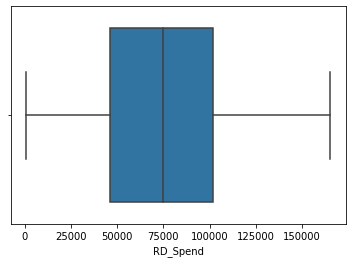

Administration


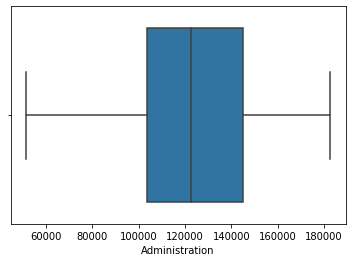

Marketing_Spend


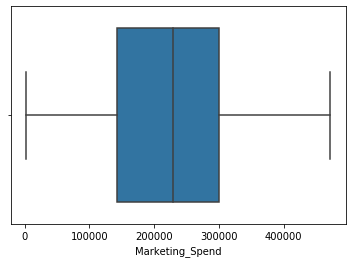

Profit


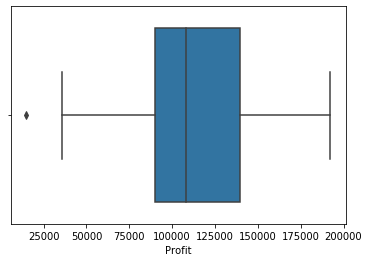

In [19]:
for i in df.columns:
    sns.boxplot(i, data=df)
    print(i)
    plt.show()

### From the Boxplots we can say that only in Profit column there are outliers

In [20]:
df['Profit'].min()

14681

RD_Spend


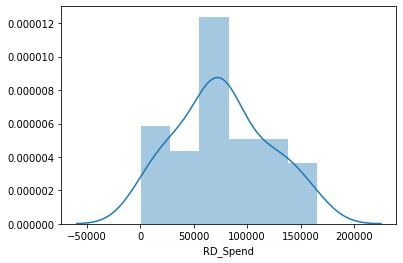

Administration


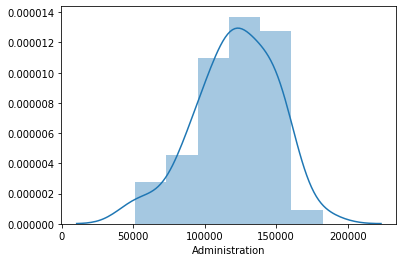

Marketing_Spend


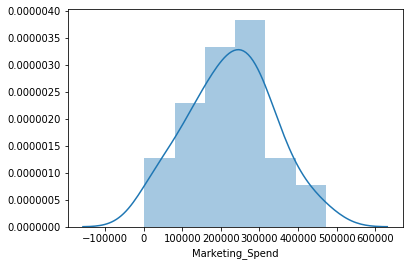

Profit


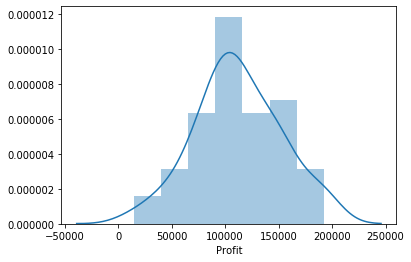

In [21]:
for i in df.columns:
    sns.distplot(df[i])
    print(i)
    plt.show()

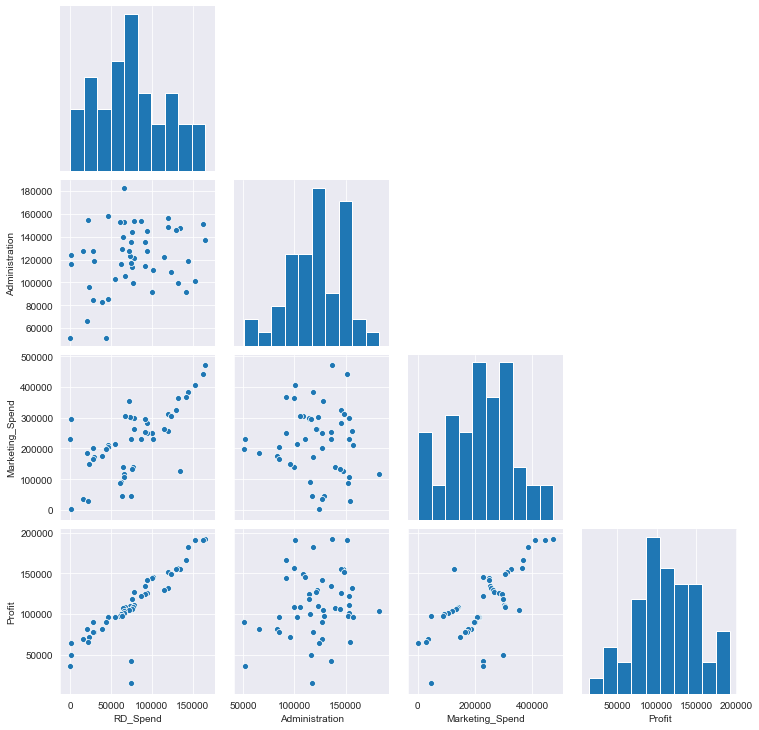

In [22]:
sns.set_style(style='darkgrid')
df_attr = df.iloc[:, :]
sns.pairplot(df_attr, corner=True, diag_kind='auto')
plt.show()

In [23]:
df.corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.268615,0.666736,0.885468
Administration,0.268615,1.000000,-0.071311,0.200715
Marketing_Spend,0.666736,-0.071311,1.000000,0.690147
Profit,0.885468,0.200715,0.690147,1.000000


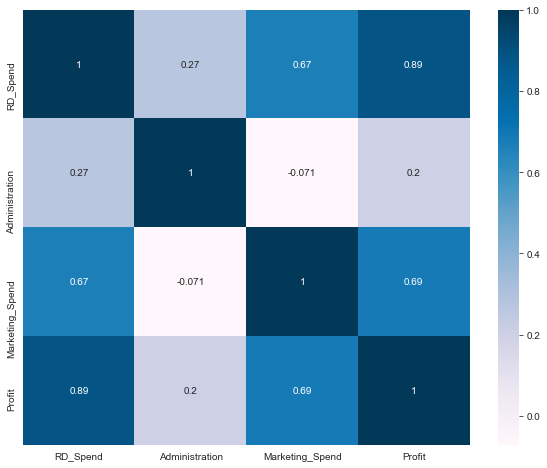

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True, cmap='PuBu')
plt.show()

In [25]:
individual_rsquare = pd.DataFrame(columns=['Name', 'Rsquared'])
individual_rsquare

,Name,Rsquared


In [26]:
import statsmodels.formula.api as smf

# From Correlation we can see Profit has good correlation with R&D Spend

## So lets see how much accuracy we can get only with R&D Spend because it has 97% correlation with Profit

# Profit ~ RD Spend (0.947)

In [27]:
formula = 'Profit ~ RD_Spend'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     174.3
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.36e-17
Time:                        06:40:47   Log-Likelihood:                -562.34
No. Observations:                  50   AIC:                             1129.
Df Residuals:                      48   BIC:                             1132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.881e+04   5484.999      8.898      0.000    3.78e+04    5.98e+04
RD_Spend       0.8240      0.062     13.201      0.000       0.698       0.949
==============================================================================
Omnibus:                       67.894   Durbin-Watson:                   1.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.624
Skew:                          -3.631   Prob(JB):                    3.35e-124
Kurtosis:                      17.839   Cond. No.                     1.80e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
individual_rsquare = individual_rsquare.append({'Name' : formula, 'Rsquared': model.rsquared*100}, ignore_index = True)
individual_rsquare

,Name,Rsquared
0,Profit ~ RD_Spend,78.405338


# Profit ~ Marketing Spend (0.559)

In [29]:
formula = 'Profit ~ Marketing_Spend'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     43.66
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           2.94e-08
Time:                        06:40:47   Log-Likelihood:                -584.48
No. Observations:                  50   AIC:                             1173.
Df Residuals:                      48   BIC:                             1177.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.507e+04   9573.506      5.752      0.000    3.58e+04    7.43e+04
Marketing_Spend     0.2533      0.038      6.607      0.000       0.176       0.330
==============================================================================
Omnibus:                        9.539   Durbin-Watson:                   0.661
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.009
Skew:                          -0.870   Prob(JB):                       0.0111
Kurtosis:                       4.138   Cond. No.                     5.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
individual_rsquare = individual_rsquare.append({'Name' : formula, 'Rsquared': model.rsquared*100}, ignore_index = True)
individual_rsquare

,Name,Rsquared
0,Profit ~ RD_Spend,78.405338
1,Profit ~ Marketing_Spend,47.630278


# Profit ~ Administration (0.040)

In [31]:
formula = 'Profit ~ Administration'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 10 Oct 2023   Prob (F-statistic):              0.162
Time:                        06:40:47   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
individual_rsquare = individual_rsquare.append({'Name' : formula, 'Rsquared': model.rsquared*100}, ignore_index = True)
individual_rsquare

,Name,Rsquared
0,Profit ~ RD_Spend,78.405338
1,Profit ~ Marketing_Spend,47.630278
2,Profit ~ Administration,4.028635


## Let's see combination of RD_Spend and Marketing_Spend

# Profit ~ RD_Spend + Marketing_Spend (0.950)

In [33]:
combination_rsquare = pd.DataFrame(columns=['Name', 'Rsquared'])
combination_rsquare

,Name,Rsquared


In [34]:
formula = 'Profit ~ RD_Spend + Marketing_Spend'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     95.17
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           2.97e-17
Time:                        06:40:48   Log-Likelihood:                -560.17
No. Observations:                  50   AIC:                             1126.
Df Residuals:                      47   BIC:                             1132.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.253e+04   6117.625      6.953      0.000    3.02e+04    5.48e+04
RD_Spend            0.7125      0.081      8.792      0.000       0.549       0.876
Marketing_Spend     0.0659      0.032      2.062      0.045       0.002       0.130
==============================================================================
Omnibus:                       59.685   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.858
Skew:                          -3.191   Prob(JB):                     5.92e-80
Kurtosis:                      14.593   Cond. No.                     6.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
combination_rsquare = combination_rsquare.append({'Name' : formula, 'Rsquared': model.rsquared*100}, ignore_index = True)
combination_rsquare

,Name,Rsquared
0,Profit ~ RD_Spend + Marketing_Spend,80.197503


# Profit ~ RD_Spend + Marketing_Spend + Administration (0.951)

In [36]:
formula = 'Profit ~ RD_Spend + Marketing_Spend + Administration'
model = smf.ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     62.13
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           3.28e-16
Time:                        06:40:48   Log-Likelihood:                -560.16
No. Observations:                  50   AIC:                             1128.
Df Residuals:                      46   BIC:                             1136.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.089e+04   1.39e+04      2.944      0.005    1.29e+04    6.88e+04
RD_Spend            0.7074      0.090      7.817      0.000       0.525       0.890
Marketing_Spend     0.0675      0.034      1.959      0.056      -0.002       0.137
Administration      0.0138      0.105      0.132      0.895      -0.197       0.224
==============================================================================
Omnibus:                       59.400   Durbin-Watson:                   0.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.469
Skew:                          -3.176   Prob(JB):                     8.76e-79
Kurtosis:                      14.498   Cond. No.                     1.52e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
combination_rsquare = combination_rsquare.append({'Name' : formula, 'Rsquared': model.rsquared*100}, ignore_index = True)
combination_rsquare

,Name,Rsquared
0,Profit ~ RD_Spend + Marketing_Spend,80.197503
1,Profit ~ RD_Spend + Marketing_Spend + Administ...,80.205051


# VIF

In [38]:
df.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit'], dtype='object')

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['RD_Spend', 'Administration', 'Marketing_Spend']]
variables.head()

,RD_Spend,Administration,Marketing_Spend
0,165349.0,136897,471784.0
1,162597.0,151377,443898.0
2,153441.0,101145,407934.0
3,144372.0,118671,383199.0
4,142107.0,91391,366168.0


In [40]:
vif = pd.DataFrame()
vif

""


In [41]:
vif_results = pd.DataFrame(columns=['Name', 'Without_Column', 'VIF_value','R_squared'])
vif_results

,Name,Without_Column,VIF_value,R_squared


In [42]:
variables.values

array([[165349., 136897., 471784.],
       [162597., 151377., 443898.],
       [153441., 101145., 407934.],
       [144372., 118671., 383199.],
       [142107.,  91391., 366168.],
       [131876.,  99814., 362861.],
       [134615., 147198., 127716.],
       [130298., 145530., 323876.],
       [120542., 148718., 311613.],
       [123334., 108679., 304981.],
       [101913., 110594., 229160.],
       [100671.,  91790., 249744.],
       [ 93863., 127320., 249839.],
       [ 91992., 135495., 252664.],
       [119943., 156547., 256512.],
       [114523., 122616., 261776.],
       [ 78013., 121597., 264346.],
       [ 94657., 145077., 282574.],
       [ 91749., 114175., 294919.],
       [ 86419., 153514., 229160.],
       [ 76253., 113867., 298664.],
       [ 78389., 153773., 299737.],
       [ 73994., 122782., 303319.],
       [ 67532., 105751., 304768.],
       [ 77044.,  99281., 140574.],
       [ 64664., 139553., 137962.],
       [ 75328., 144135., 134050.],
       [ 72107., 127864., 35

In [43]:
variables.shape[1]

3

In [44]:
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,8.471409,RD_Spend
1,4.897864,Administration
2,7.893219,Marketing_Spend


In [45]:
vif['VIF'].max()

8.471408999148123

## VIF is Variance Inflation Factor 
## VIF > 5 is cause for concern and VIF > 10 indicates a serious collinearity problem

#### We should also not remove all the columns which have VIF more than 10 at one shot we have to do it in one after another in Descending to Ascending order.

### But we don't have any VIF value greater than 10, So we can go for directly Linear Regression Algorithm.

# -----------------------------------------------------------------------------------------------

## Let's take all columns for algorithm

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [47]:
final_results = pd.DataFrame(columns=['Name', 'Train_Result', 'Test_Result'])
final_results

,Name,Train_Result,Test_Result


# Normal Transformation

In [48]:
df.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit'], dtype='object')

In [49]:
X = df[['RD_Spend', 'Administration', 'Marketing_Spend']]
y = df[['Profit']]

In [50]:
X.head()

,RD_Spend,Administration,Marketing_Spend
0,165349.0,136897,471784.0
1,162597.0,151377,443898.0
2,153441.0,101145,407934.0
3,144372.0,118671,383199.0
4,142107.0,91391,366168.0


In [51]:
y.head()

,Profit
0,192261
1,191792
2,191050
3,182901
4,166187


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

In [53]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35, 3) (15, 3) (35, 1) (15, 1)


In [54]:
multiLR_model= LinearRegression()
multiLR_model.fit(X_train, y_train)

LinearRegression()

In [55]:
multiLR_model.coef_

array([[0.60828251, 0.04429313, 0.1070711 ]])

In [56]:
X_train.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend'], dtype='object')

In [57]:
enumerate(X_train.columns)

In [58]:
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, multiLR_model.coef_[0][idx]))

The coefficient for RD_Spend is 0.6082825111476438
The coefficient for Administration is 0.044293130787729375
The coefficient for Marketing_Spend is 0.10707110141951903


In [59]:
intercept = multiLR_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 36382.400149625115


In [60]:
train_score = multiLR_model.score(X_train, y_train)
train_score

0.7473122701786334

In [61]:
test_score = multiLR_model.score(X_test, y_test)
test_score

0.8803910170528042

In [62]:
df1 = df[['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit']]
df1.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.0,136897,471784.0,192261
1,162597.0,151377,443898.0,191792
2,153441.0,101145,407934.0,191050
3,144372.0,118671,383199.0,182901
4,142107.0,91391,366168.0,166187


In [63]:
df1['y_pred'] = multiLR_model.predict(X)
df1.head()

,RD_Spend,Administration,Marketing_Spend,Profit,y_pred
0,165349.0,136897,471784.0,192261,193539.334323
1,162597.0,151377,443898.0,191792,189520.920652
2,153441.0,101145,407934.0,191050,177875.848343
3,144372.0,118671,383199.0,182901,170487.211966
4,142107.0,91391,366168.0,166187,166077.607542


In [64]:
df1['Error'] = df1['Profit'] - df1['y_pred']
df1.head()

,RD_Spend,Administration,Marketing_Spend,Profit,y_pred,Error
0,165349.0,136897,471784.0,192261,193539.334323,-1278.334323
1,162597.0,151377,443898.0,191792,189520.920652,2271.079348
2,153441.0,101145,407934.0,191050,177875.848343,13174.151657
3,144372.0,118671,383199.0,182901,170487.211966,12413.788034
4,142107.0,91391,366168.0,166187,166077.607542,109.392458


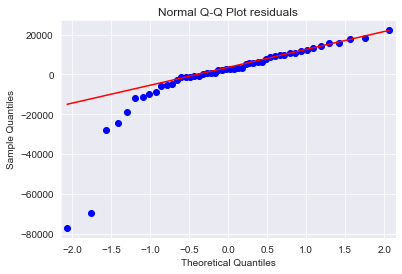

In [65]:
import statsmodels.api as sm
sm.qqplot(df1['Error'], line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q Plot residuals")
plt.show()

In [66]:
final_results = final_results.append({'Name': 'Normal Transformation', 'Train_Result': train_score*100,'Test_Result': test_score*100}, ignore_index = True)
final_results

,Name,Train_Result,Test_Result
0,Normal Transformation,74.731227,88.039102


# Log Transformation

In [67]:
X = np.log(df[['RD_Spend', 'Administration', 'Marketing_Spend']])
y = np.log(df[['Profit']])

In [68]:
X.head()

,RD_Spend,Administration,Marketing_Spend
0,12.015814,11.826984,13.064277
1,11.999030,11.927529,13.003350
2,11.941071,11.524310,12.918861
3,11.880149,11.684110,12.856310
4,11.864336,11.422902,12.810848


In [69]:
y.head()

,Profit
0,12.166609
1,12.164167
2,12.160290
3,12.116700
4,12.020869


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

In [74]:
multiLR_model_LOG= LinearRegression()
multiLR_model_LOG.fit(X_train, y_train)

LinearRegression()

In [75]:
multiLR_model_LOG.coef_

array([[0.08567845, 0.30362189, 0.3938266 ]])

In [76]:
X_train.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend'], dtype='object')

In [77]:
enumerate(X_train.columns)

In [78]:
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, multiLR_model_LOG.coef_[0][idx]))

The coefficient for RD_Spend is 0.08567845432649648
The coefficient for Administration is 0.30362188540651464
The coefficient for Marketing_Spend is 0.3938266026170679


In [79]:
intercept = multiLR_model_LOG.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2.3048115889929406


In [80]:
train_score = multiLR_model_LOG.score(X_train, y_train)
train_score

0.45373275086801745

In [81]:
test_score = multiLR_model_LOG.score(X_test, y_test)
test_score

-0.3594783024001793

In [82]:
df2 = np.log(df[['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit']])
df2.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,12.015814,11.826984,13.064277,12.166609
1,11.999030,11.927529,13.003350,12.164167
2,11.941071,11.524310,12.918861,12.160290
3,11.880149,11.684110,12.856310,12.116700
4,11.864336,11.422902,12.810848,12.020869


In [83]:
df2['y_pred'] = multiLR_model_LOG.predict(X)
df2.head()

,RD_Spend,Administration,Marketing_Spend,Profit,y_pred
0,12.015814,11.826984,13.064277,12.166609,12.070299
1,11.999030,11.927529,13.003350,12.164167,12.075394
2,11.941071,11.524310,12.918861,12.160290,11.914728
3,11.880149,11.684110,12.856310,12.116700,11.933393
4,11.864336,11.422902,12.810848,12.020869,11.834825


In [84]:
df2['Error'] = df2['Profit'] - df2['y_pred']
df2.head()

,RD_Spend,Administration,Marketing_Spend,Profit,y_pred,Error
0,12.015814,11.826984,13.064277,12.166609,12.070299,0.096310
1,11.999030,11.927529,13.003350,12.164167,12.075394,0.088773
2,11.941071,11.524310,12.918861,12.160290,11.914728,0.245562
3,11.880149,11.684110,12.856310,12.116700,11.933393,0.183308
4,11.864336,11.422902,12.810848,12.020869,11.834825,0.186044


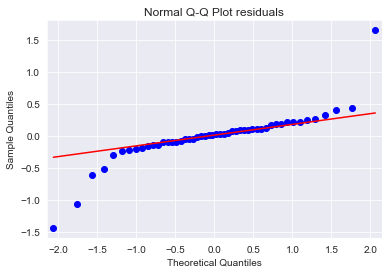

In [85]:
sm.qqplot(df2['Error'], line='q')
plt.title("Normal Q-Q Plot residuals")
plt.show()

In [86]:
final_results = final_results.append({'Name': 'Log Transformation', 'Train_Result': train_score*100,'Test_Result': test_score*100}, ignore_index = True)
final_results

,Name,Train_Result,Test_Result
0,Normal Transformation,74.731227,88.039102
1,Log Transformation,45.373275,-35.947830


# Square Transformation

In [87]:
X = df[['RD_Spend', 'Administration', 'Marketing_Spend']]**2
y = df[['Profit']]**2

In [88]:
X.head()

,RD_Spend,Administration,Marketing_Spend
0,2.734029e+10,18740788609,2.225801e+11
1,2.643778e+10,22914996129,1.970454e+11
2,2.354414e+10,10230311025,1.664101e+11
3,2.084327e+10,14082806241,1.468415e+11
4,2.019440e+10,8352314881,1.340790e+11


In [89]:
y.head()

,Profit
0,36964292121
1,36784171264
2,36500102500
3,33452775801
4,27618118969


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

In [91]:
multiLR_model_Square= LinearRegression()
multiLR_model_Square.fit(X_train, y_train)

LinearRegression()

In [92]:
multiLR_model_Square.coef_

array([[1.00176298, 0.01581535, 0.03053213]])

In [93]:
X_train.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend'], dtype='object')

In [94]:
enumerate(X_train.columns)

In [95]:
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, multiLR_model_Square.coef_[0][idx]))

The coefficient for RD_Spend is 1.0017629816672204
The coefficient for Administration is 0.015815348457934822
The coefficient for Marketing_Spend is 0.030532128257140703


In [96]:
intercept = multiLR_model_Square.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 4413787137.804483


In [97]:
train_score = multiLR_model_Square.score(X_train, y_train)
train_score

0.8915000775199622

In [98]:
test_score = multiLR_model_Square.score(X_test, y_test)
test_score

0.921322685233313

In [100]:
df3 = df[['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit']]**2
df3.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,2.734029e+10,18740788609,2.225801e+11,36964292121
1,2.643778e+10,22914996129,1.970454e+11,36784171264
2,2.354414e+10,10230311025,1.664101e+11,36500102500
3,2.084327e+10,14082806241,1.468415e+11,33452775801
4,2.019440e+10,8352314881,1.340790e+11,27618118969


In [101]:
df3['y_pred'] = multiLR_model_Square.predict(X)
df3.head()

,RD_Spend,Administration,Marketing_Spend,Profit,y_pred
0,2.734029e+10,18740788609,2.225801e+11,36964292121,3.889452e+10
1,2.643778e+10,22914996129,1.970454e+11,36784171264,3.727681e+10
2,2.354414e+10,10230311025,1.664101e+11,36500102500,3.324209e+10
3,2.084327e+10,14082806241,1.468415e+11,33452775801,2.999992e+10
4,2.019440e+10,8352314881,1.340790e+11,27618118969,2.886960e+10


In [102]:
df3['Error'] = df3['Profit'] - df3['y_pred']
df3.head()

,RD_Spend,Administration,Marketing_Spend,Profit,y_pred,Error
0,2.734029e+10,18740788609,2.225801e+11,36964292121,3.889452e+10,-1.930225e+09
1,2.643778e+10,22914996129,1.970454e+11,36784171264,3.727681e+10,-4.926347e+08
2,2.354414e+10,10230311025,1.664101e+11,36500102500,3.324209e+10,3.258015e+09
3,2.084327e+10,14082806241,1.468415e+11,33452775801,2.999992e+10,3.452861e+09
4,2.019440e+10,8352314881,1.340790e+11,27618118969,2.886960e+10,-1.251482e+09


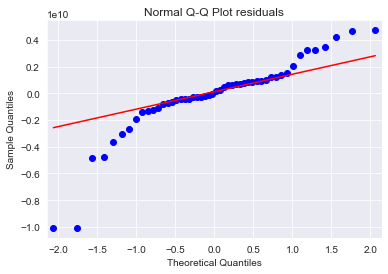

In [103]:
sm.qqplot(df3['Error'], line='q')
plt.title("Normal Q-Q Plot residuals")
plt.show()

In [104]:
final_results = final_results.append({'Name': 'Square Transformation', 'Train_Result': train_score*100,'Test_Result': test_score*100}, ignore_index = True)
final_results

,Name,Train_Result,Test_Result
0,Normal Transformation,74.731227,88.039102
1,Log Transformation,45.373275,-35.947830
2,Square Transformation,89.150008,92.132269


# Square Root Transformation

In [105]:
X = np.sqrt(df[['RD_Spend', 'Administration', 'Marketing_Spend']])
y = np.sqrt(df[['Profit']])

In [106]:
X.head()

,RD_Spend,Administration,Marketing_Spend
0,406.631283,369.995946,686.865343
1,403.233183,389.071973,666.256707
2,391.715458,318.033017,638.697111
3,379.963156,344.486574,619.030694
4,376.970821,302.309444,605.118170


In [107]:
y.head()

,Profit
0,438.475769
1,437.940635
2,437.092668
3,427.669265
4,407.660398


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

In [109]:
multiLR_model_Square_root= LinearRegression()
multiLR_model_Square_root.fit(X_train, y_train)

LinearRegression()

In [110]:
multiLR_model_Square_root.coef_

array([[0.35441191, 0.12260653, 0.21007322]])

In [111]:
X_train.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend'], dtype='object')

In [112]:
enumerate(X_train.columns)

In [113]:
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, multiLR_model_Square_root.coef_[0][idx]))

The coefficient for RD_Spend is 0.35441191047443565
The coefficient for Administration is 0.12260652665596361
The coefficient for Marketing_Spend is 0.21007321658608652


In [114]:
intercept = multiLR_model_Square_root.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 98.4711671043732


In [115]:
train_score = multiLR_model_Square_root.score(X_train, y_train)
train_score

0.6070076745755343

In [116]:
test_score = multiLR_model_Square_root.score(X_test, y_test)
test_score

0.7345762436251739

In [118]:
df4 = np.sqrt(df[['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit']])
df4.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,406.631283,369.995946,686.865343,438.475769
1,403.233183,389.071973,666.256707,437.940635
2,391.715458,318.033017,638.697111,437.092668
3,379.963156,344.486574,619.030694,427.669265
4,376.970821,302.309444,605.118170,407.660398


In [119]:
df4['y_pred'] = multiLR_model_Square_root.predict(X)
df4.head()

,RD_Spend,Administration,Marketing_Spend,Profit,y_pred
0,406.631283,369.995946,686.865343,438.475769,432.242067
1,403.233183,389.071973,666.256707,437.940635,429.047263
2,391.715458,318.033017,638.697111,437.092668,410.465871
3,379.963156,344.486574,619.030694,427.669265,405.412707
4,376.970821,302.309444,605.118170,407.660398,396.258347


In [121]:
df4['Error'] = df4['Profit'] - df4['y_pred']
df4.head()

,RD_Spend,Administration,Marketing_Spend,Profit,y_pred,Error
0,406.631283,369.995946,686.865343,438.475769,432.242067,6.233702
1,403.233183,389.071973,666.256707,437.940635,429.047263,8.893373
2,391.715458,318.033017,638.697111,437.092668,410.465871,26.626796
3,379.963156,344.486574,619.030694,427.669265,405.412707,22.256558
4,376.970821,302.309444,605.118170,407.660398,396.258347,11.402050


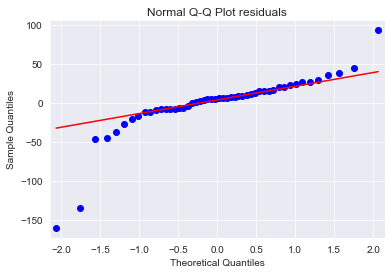

In [122]:
sm.qqplot(df4['Error'], line='q')
plt.title("Normal Q-Q Plot residuals")
plt.show()

In [123]:
final_results = final_results.append({'Name': 'Square Root Transformation', 'Train_Result': train_score*100,'Test_Result': test_score*100}, ignore_index = True)
final_results

,Name,Train_Result,Test_Result
0,Normal Transformation,74.731227,88.039102
1,Log Transformation,45.373275,-35.947830
2,Square Transformation,89.150008,92.132269
3,Square Root Transformation,60.700767,73.457624


# So, we can conclude 'Square Transformation' is the best, because in Train we got 89% and in Test we got 92% Score and the variance is 3 so we can consider this as final Algorithm with Square Transformation.

In [124]:
individual_rsquare

,Name,Rsquared
0,Profit ~ RD_Spend,78.405338
1,Profit ~ Marketing_Spend,47.630278
2,Profit ~ Administration,4.028635


In [125]:
combination_rsquare

,Name,Rsquared
0,Profit ~ RD_Spend + Marketing_Spend,80.197503
1,Profit ~ RD_Spend + Marketing_Spend + Administ...,80.205051
